Lessons learnt : system identification using direct ODE solving ( Eulers method) results in much faster and cleaner 
code than using state space or  Lsim. 



In [38]:
from numpy import *
from scipy import interpolate,integrate
import numpy as np

In [60]:
class Tf:
    def __init__(self,k=0,d=0,tau1=0,tau2=0,beta=0,ramp=False):
        self.k = k
        self.d =d
        self.tau1= tau1
        self.tau2 = tau2
        self.beta = beta
        self.ramp = ramp
    def sim(self,U=None,T=None,X0=None):
        num  = np.array([self.k*self.beta, self.k])
        num = np.trim_zeros(num,'f')
        den = np.array([self.tau2,self.tau1,(1-int(self.ramp))])
        den = np.trim_zeros(den,'f')
        
        nn = len(num.shape)
        if nn == 1:
            num = asarray([num], num.dtype)
        M = num.shape[1]
        K = len(den)
        
        if M == 0 or K == 0:  # Null system
            return (array([], float), array([], float), array([], float),
                    array([], float))

        # pad numerator to have same number of columns has denominator
        num = r_['-1', zeros((num.shape[0], K - M), num.dtype), num]

        if num.shape[-1] > 0:
            D = num[:, 0]
        else:
            D = array([], float)

        if K == 1:
            return array([], float), array([], float), array([], float), D

        frow = -array([den[1:]])
        A = r_[frow, eye(K - 2, K - 1)]
        B = eye(K - 1, 1)
        C = num[:, 1:] - num[:, 0] * den[1:]
        
        return A,B,C,D
    

In [ ]:
def fprime(x, t, A,B,C,D,d,ufunc):
    """The vector field of the linear system."""
    return dot(A, x) + squeeze(dot(B, nan_to_num(ufunc(max(0,[t-d]))))) # max function to remove the negative points in time due to delay
xout = integrate.odeint(fprime, X0, T, args=(A,B,C,D,d, ufunc))
yout = dot(C, transpose(xout)) + dot(D, transpose(U))
        else:
            def fprime(x, t, sys):
                """The vector field of the linear system."""
                return dot(A, x)
            xout = integrate.odeint(fprime, X0, T, args=(A,B,C,D,d))
            yout = dot(C, transpose(xout))

In [80]:
tf = Tf(k=-2,tau1=1,tau2=5,d=2)
u = zeros(101)
u[20:60] = 5



In [42]:
import matplotlib.pyplot as plt

In [81]:
A,B,C,D = tf.sim()

In [82]:
A,B,C,D

(array([[-1., -1.],
        [ 1.,  0.]]), array([[ 1.],
        [ 0.]]), array([[ 0, -2]]), array([0]))

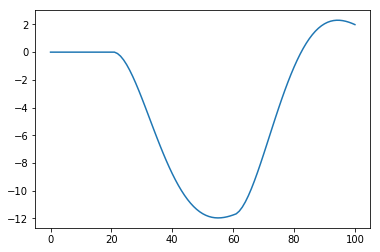

In [83]:
T = np.arange(0,len(u))
outputs=[]
dt = 0.1
x  = zeros((A.shape[0], 1)) #initialize X
for t in T:
    xdot = A.dot(x) + B.dot(int(u[t]))
    y = C.dot(x)
    outputs.append(y[0,0])
    x = x + xdot*dt

plt.plot(outputs)


In [107]:
tf.sim(U=u,T=T)

T= arange(0,101,1)



        

In [99]:
A,B,C,D = tf.sim()

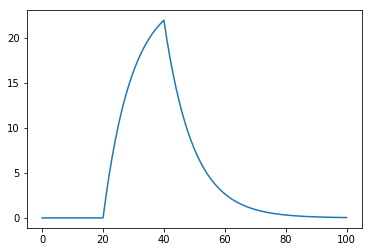

In [110]:
plt.plot(outputs)

In [33]:
sys.to_ss()

StateSpaceContinuous(
array([[-0.1]]),
array([[ 1.]]),
array([[ 0.5]]),
array([[ 0.]]),
dt: None
)

In [37]:
%matplotlib inline

In [39]:
import matplotlib.pyplot as plt

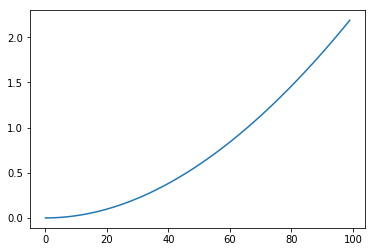

In [49]:
# note ramp model is defined with a trailing zero  
sys = lti([2],[20,1,0])
plt.plot(sys.step()[1])

In [53]:
a = np.array([0,5,2])
b = np.trim_zeros(a,'f')
b

array([5, 2])